## Automatic Classification of Products into Categories
#### ECE 3610 Final Project


<p>
    Part one: Data clean
    Get data into a dataframe. It has text, category, and appID
<p/>
    

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import re

def format(text):
    # Function to clean text
    text = text.lower()
    # Remove brackets, numbers, and new lines
    text = re.sub('<(.*?)>|[(.*?]>|\\n|[0-9].', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),
                  '', text)  # remove punctuation
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[''""...\n\t\r\b]', ' ', text)  # remove quotes
    return text




df = pd.read_csv('steam_description_data.csv')[['steam_appid','about_the_game']]
df['about_the_game'] = df['about_the_game'].apply(lambda x: format(x)) #Clean

categories = pd.read_csv('steam.csv')[['appid','steamspy_tags']]
df = df.set_index('steam_appid').join(categories.set_index('appid'))

#Make numerical values for each possible tag
tags = df['steamspy_tags']
dic = {}
idcode = {}
for index, row in tags.iteritems():
    tag = str(row).split(';')[0]
    res = sum(x == tag for x in dic.values()) 
    if res>25:
        tag = str(row).split(';')[-1]
    dic.update({index:tag})

tags = pd.DataFrame.from_dict(dic,orient='index',columns =['Top Tag'])
tags['category_id']=tags['Top Tag'].factorize()[0]


#use later
category_id_df = tags[['Top Tag', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Top Tag']].values)

df = df.join(tags)
df = df.rename(columns ={"steam_appid":"ID","about_the_game":"Text","steamspy_tags":"Tags",'0':"Top Tag"})
df

,Text,Tags,Top Tag,category_id
steam_appid,,,,
10,play the worlds number online action game eng...,Action;FPS;Multiplayer,Action,0
20,one of the most popular online action games of...,Action;FPS;Multiplayer,Action,0
30,enlist in an intense brand of axis vs allied t...,FPS;World War II;Multiplayer,FPS,1
40,enjoy fastpaced multiplayer gaming with deathm...,Action;FPS;Multiplayer,Action,0
50,return to the black mesa research facility as ...,FPS;Action;Sci-fi,FPS,1
...,...,...,...,...
1065230,this is my first indie game on steam i playe...,Adventure;Indie;Casual,Casual,15
1065570,have you ever been so lonely that no one but y...,Action;Indie;Adventure,Adventure,30
1065650,super star blast is a space based game with ...,Action;Indie;Casual,Casual,15


In [21]:
print("Number of classes: " + str(len(category_to_id)))
print("Number of Samples: " + str(df.shape[0]))
category_to_id.keys()

Number of classes: 329
Number of Samples: 27334


dict_keys(['Action', 'FPS', 'Puzzle', 'Free to Play', 'Zombies', 'Indie', 'World War II', 'Strategy', 'Hacking', 'Turn-Based Strategy', 'Simulation', 'RPG', 'Animation & Modeling', 'Classic', 'Multiplayer', 'Casual', 'Western', 'Space', 'Racing', 'Tower Defense', 'Base-Building', 'Female Protagonist', 'Platformer', 'Pirates', 'Sandbox', 'Card Game', 'Atmospheric', 'Horror', 'Historical', 'Star Wars', 'Adventure', 'Third-Person Shooter', "Beat 'em up", 'Management', 'Grand Strategy', 'RTS', 'Sci-fi', 'Great Soundtrack', 'Tactical', 'Stealth', 'Naval', 'Shooter', 'Cyberpunk', 'Fantasy', 'Trains', 'World War I', 'Crime', 'Singleplayer', 'Open World', 'Arcade', '4X', 'Warhammer 40K', 'Anime', 'Time Manipulation', 'Sports', 'Gore', 'Military', 'Aliens', 'Isometric', 'Top-Down', 'Noir', 'nan', 'Point & Click', 'Steampunk', 'Parkour', 'Psychological Horror', 'Turn-Based', 'First-Person', '2D', 'Match 3', 'Hidden Object', 'Early Access', 'City Builder', 'Tanks', 'Story Rich', 'Mature', 'LEGO',

## Part two
Analyze distributions

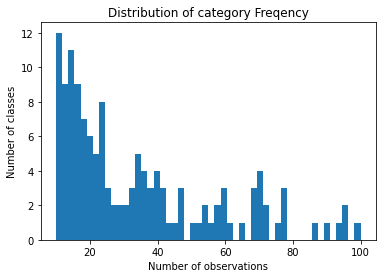

In [22]:
import matplotlib.pyplot as plt
def plot_dist_of_cat(df):
    plt.hist(df.category_id.value_counts(), 50, range = [10,100])
    plt.xlabel('Number of observations')
    plt.ylabel('Number of classes')
    plt.title('Distribution of category Freqency')
    
plot_dist_of_cat(df)

In [23]:
list = ['Action','Puzzle','Simulation','RPG','Western','Space','Racing','Adventure','Survival','Fighting','Platformer','City Builder']
mask = df['Top Tag'].isin(list)
Y = df[mask].category_id.value_counts().keys()
Y


Int64Index([30, 0, 10, 11, 2, 22, 18, 17, 160, 78, 72, 16], dtype='int64')

In [24]:
#Only use the selected tags
mask = df['category_id'].isin(Y)
df = df[mask]


#Make numerical values for each possible tag
tags = df['Top Tag']
dic = {}
idcode = {}
for index, row in tags.iteritems():
    tag = str(row).split(';')[0]
    dic.update({index:tag})
    
tags = pd.DataFrame.from_dict(dic,orient='index',columns =['Top Tag'])
tags['category_id']=tags['Top Tag'].factorize()[0]

df



,Text,Tags,Top Tag,category_id
steam_appid,,,,
10,play the worlds number online action game eng...,Action;FPS;Multiplayer,Action,0
20,one of the most popular online action games of...,Action;FPS;Multiplayer,Action,0
40,enjoy fastpaced multiplayer gaming with deathm...,Action;FPS;Multiplayer,Action,0
60,a futuristic action game that challenges your ...,Action;FPS;Multiplayer,Action,0
80,with its extensive tour of duty campaign a nea...,Action;FPS;Multiplayer,Action,0
...,...,...,...,...
1064580,in the game you control the spacecraft and in ...,Early Access;Indie;Adventure,Adventure,30
1064890,old edge ii is the second part of that hardco...,Indie;Casual;Adventure,Adventure,30
1065570,have you ever been so lonely that no one but y...,Action;Indie;Adventure,Adventure,30


The Classes are as follows:

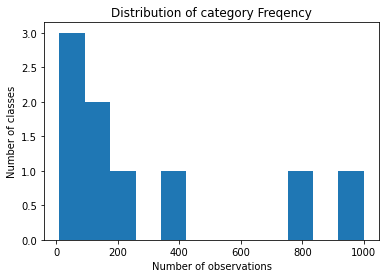

In [25]:
import matplotlib.pyplot as plt
def plot_dist_of_cat(df):
    plt.hist(df.category_id.value_counts(),12, range = [10,1000])
    plt.xlabel('Number of observations')
    plt.ylabel('Number of classes')
    plt.title('Distribution of category Freqency')
    
plot_dist_of_cat(df)

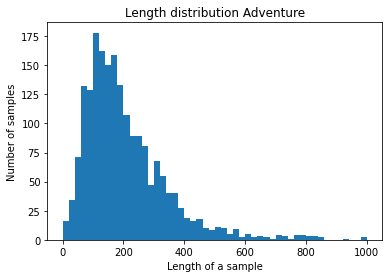

Mean words per sample: 173.0
Variance in words per sample: 25094.352808632728


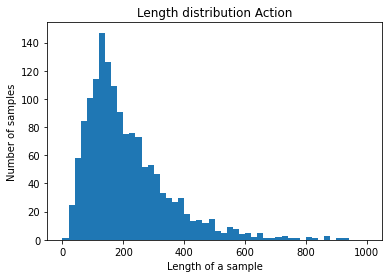

Mean words per sample: 176.0
Variance in words per sample: 25998.63940904179


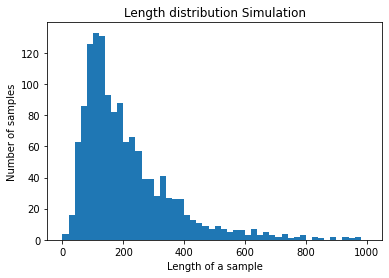

Mean words per sample: 169.0
Variance in words per sample: 26359.83679206793


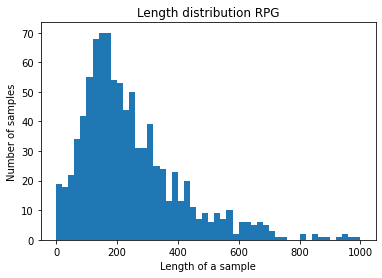

Mean words per sample: 205.0
Variance in words per sample: 35435.14226091229


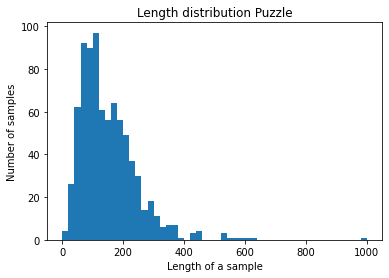

Mean words per sample: 130.0
Variance in words per sample: 9191.999633363035


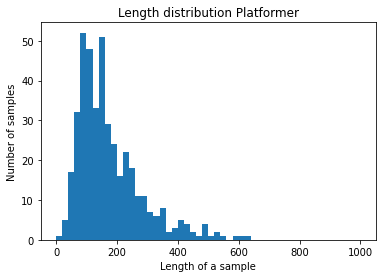

Mean words per sample: 148.0
Variance in words per sample: 13525.029994331066


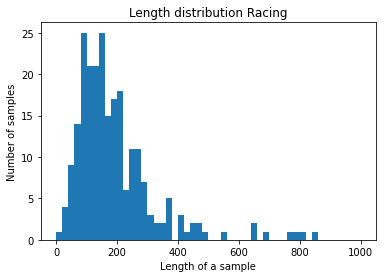

Mean words per sample: 158.0
Variance in words per sample: 18664.933468478343


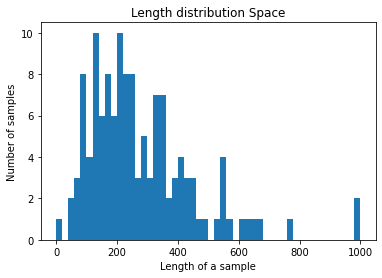

Mean words per sample: 237.5
Variance in words per sample: 108772.17751479289


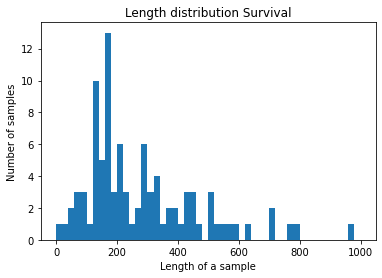

Mean words per sample: 216.0
Variance in words per sample: 46857.63146814405


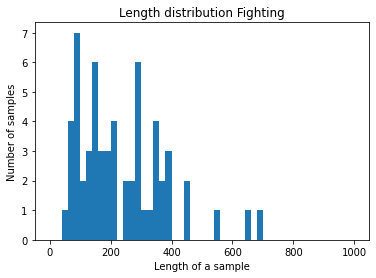

Mean words per sample: 210.0
Variance in words per sample: 20093.52944556162


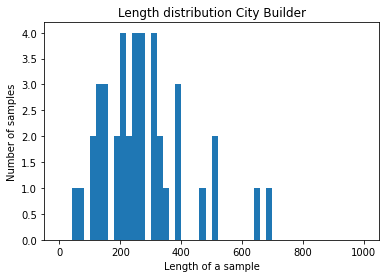

Mean words per sample: 247.5
Variance in words per sample: 35812.56746031746


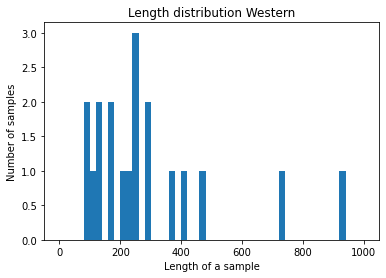

Mean words per sample: 246.0
Variance in words per sample: 44779.817174515236


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def get_num_words_per_sample(sample_texts):
    #Returns the median number of words per sample given corpus.

    
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def get_var_words_per_sample(sample_texts):
    #Returns the median number of words per sample given corpus.

    num_words = [len(s.split()) for s in sample_texts]
    return np.var(num_words)

def plot_sample_length_distribution(sample_texts,title):
    #Plots length distribution.

    plt.figure()
    plt.hist([len(s.split()) for s in sample_texts], 50,range = [0,1000])
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Length distribution ' + title)
    plt.show()
    print("Mean words per sample: " + str(get_num_words_per_sample(sample_texts))) 
    print("Variance in words per sample: " + str(get_var_words_per_sample(sample_texts)))   

for i in Y:
    mask = df['category_id'] == i
    temp = df[mask]
    plot_sample_length_distribution(temp.Text,str(id_to_category[i]))


# Investigate top words

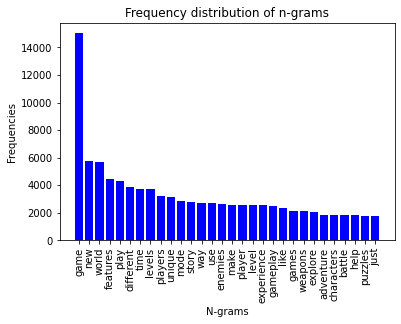

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def plot_frequency_distribution_of_ngrams(sample_texts,num_ngrams=30):

    vectorizer = CountVectorizer(ngram_range=(1, 1),strip_accents='unicode',stop_words = 'english')

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = vectorizer.get_feature_names()
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = all_ngrams[:num_ngrams]
    counts = all_counts[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=90)
    plt.show()

    
plot_frequency_distribution_of_ngrams(df.Text)

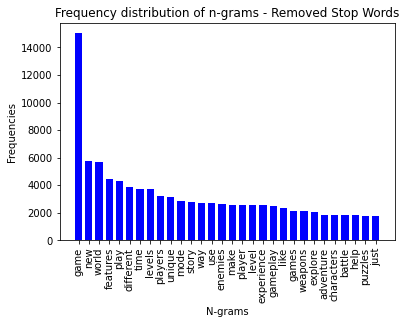

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=30):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'stop_words': 'english',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = vectorizer.get_feature_names()
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = all_ngrams[:num_ngrams]
    counts = all_counts[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=.7, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams - Removed Stop Words')
    plt.xticks(idx, ngrams, rotation=90)
    plt.show()

    
plot_frequency_distribution_of_ngrams(df.Text)

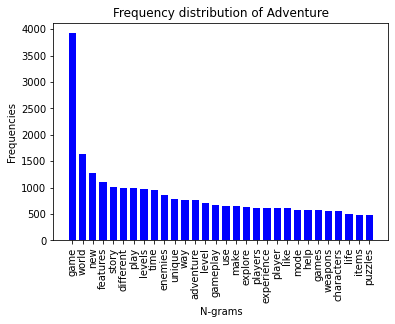

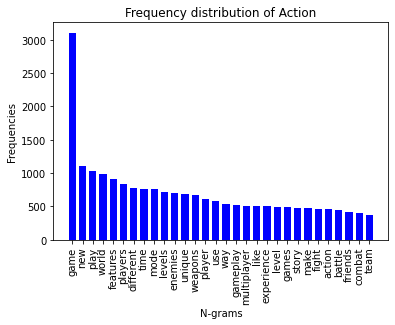

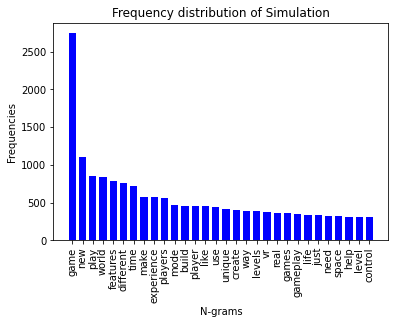

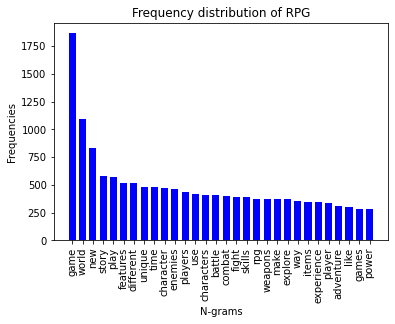

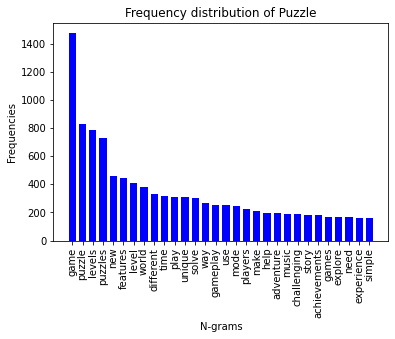

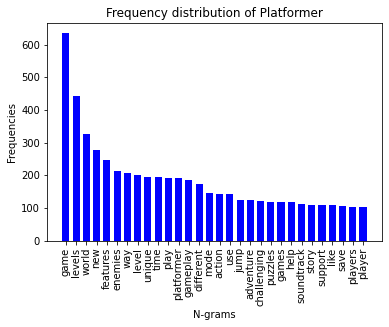

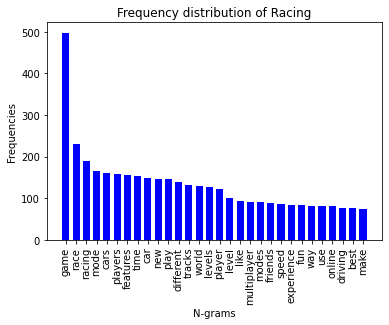

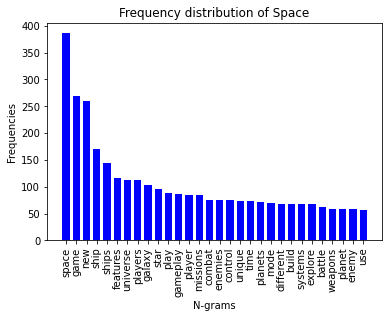

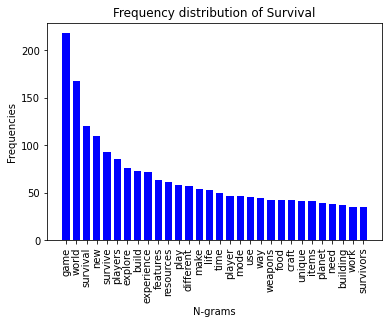

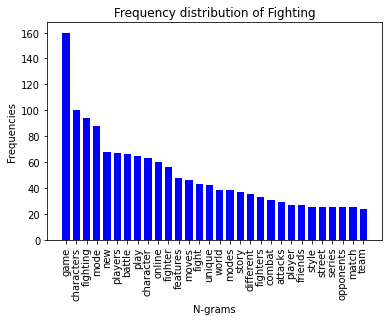

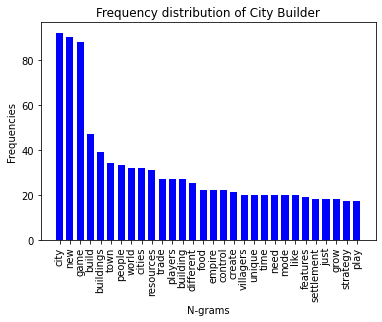

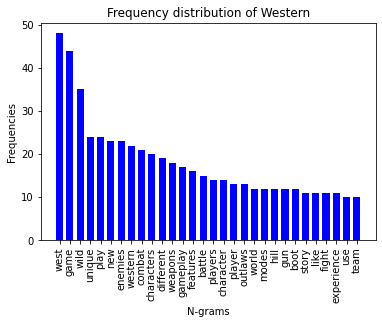

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(['game'])

def plot_frequency_distribution_of_ngrams(sample_texts,cat, num_ngrams=30):
    
    vectorizer = CountVectorizer(ngram_range=(1, 1),strip_accents='unicode',stop_words = 'english')

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = vectorizer.get_feature_names()
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = all_ngrams[:num_ngrams]
    counts = all_counts[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=.7, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of ' + cat)
    plt.xticks(idx, ngrams, rotation=90)
    plt.show()

for cat in Y:
    tmp_df = df[df['category_id'] == cat]
    plot_frequency_distribution_of_ngrams(tmp_df.Text,id_to_category[cat])


In [31]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction import text 
from sklearn.feature_selection import f_classif

stop_words = text.ENGLISH_STOP_WORDS.union(['game'])
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)
features = tfidf.fit_transform(df.Text).toarray()
labels = df.category_id
N = 3

for category_id in sorted(Y):
  features_chi2 = f_classif(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(id_to_category[category_id]))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Action':
  . Most correlated unigrams:
. action
. weapons
. multiplayer
  . Most correlated bigrams:
. team deathmatch
. capture flag
. local multiplayer
# 'Puzzle':
  . Most correlated unigrams:
. solve
. puzzles
. puzzle
  . Most correlated bigrams:
. solve puzzle
. minimalist puzzle
. solve puzzles
# 'Simulation':
  . Most correlated unigrams:
. vr
. simulator
. simulation
  . Most correlated bigrams:
. vr experience
. career mode
. virtual reality
# 'RPG':
  . Most correlated unigrams:
. unstoppable
. fueled
. rpg
  . Most correlated bigrams:
. power imagination
. unstoppable power
. vast unstoppable
# 'Western':
  . Most correlated unigrams:
. western
. outlaws
. west
  . Most correlated bigrams:
. adventure packed
. old west
. wild west
# 'Space':
  . Most correlated unigrams:
. ships
. galaxy
. space
  . Most correlated bigrams:
. deep space
. space strategy
. star systems
# 'Racing':
  . Most correlated unigrams:
. cars
. race
. racing
  . Most correlated bigrams:
. racing m

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

def ngram_vectorize(train_texts, train_labels, val_texts):
    vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=.05, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words='english')

    # Learn vocabulary from training texts and count training texts.
    x_train = vectorizer.fit_transform(train_texts)

    x_val = vectorizer.transform(val_texts)

    # Select features
    selector = SelectKBest(f_classif, k=min(20000, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    return x_train, x_val



X_train, X_test, y_train, y_test = train_test_split(df.Text, df.category_id, test_size=0.33, random_state=42)
x_train, x_test = ngram_vectorize(X_train,y_train,X_test)

In [34]:
from sklearn.naive_bayes import MultinomialNB
import pickle 
clf = MultinomialNB()
clf.fit(x_train, y_train)


MultinomialNB()

In [35]:
score = clf.score(x_test, y_test)
print("Accuracy of ")

Accuracy of 


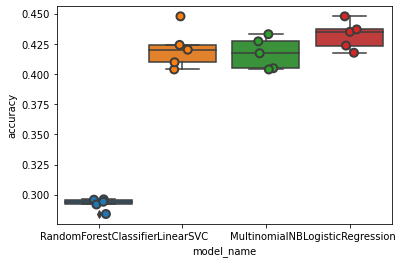

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),

]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [38]:
import pickle
mdl = LinearSVC()
pickle.dump(LinearSVC,open('mdl.p','wb'))

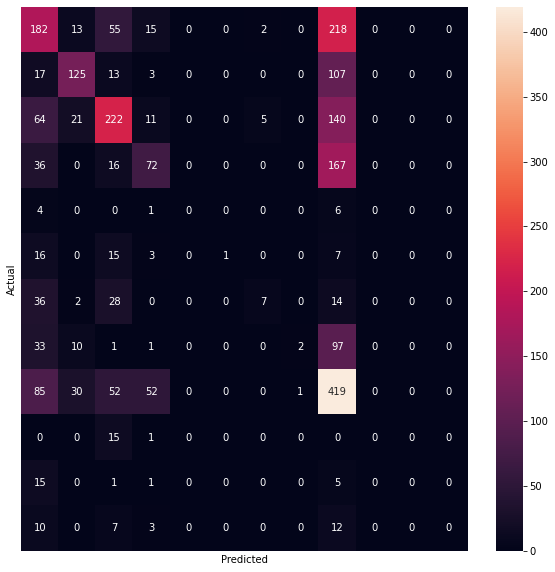

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text 
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns


# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1,1)

# Limit on the number of features. We use the top 20K features.
TOP_K = 10000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY =.02

def ngram_vectorize(train_texts, train_labels, val_texts):
    vectorizer = TfidfVectorizer(sublinear_tf=True,max_df = .8, min_df=MIN_DOCUMENT_FREQUENCY, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=text.ENGLISH_STOP_WORDS.union(['game','new','world']))

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    return x_train, x_val



X_train, X_test, y_train, y_test = train_test_split(df.Text, df.category_id, test_size=0.33, random_state=42)

x_train, x_test = ngram_vectorize(X_train,y_train,X_test)

import pickle
pickle.dump(x_train,open('train.p','wb'))
pickle.dump(x_test,open('test.p','wb'))
pickle.dump(y_train,open('ytrain.p','wb'))
pickle.dump(y_test,open('ytest.p','wb'))


model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df[category_id_df['Top Tag'].isin(Y)].values, yticklabels=category_id_df[category_id_df['Top Tag'].isin(Y)].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Top Tag'].unique()))

precision    recall  f1-score   support

      Action       0.37      0.38      0.37       485
      Puzzle       0.62      0.47      0.54       265
  Simulation       0.52      0.48      0.50       463
         RPG       0.44      0.25      0.32       291
     Western       0.00      0.00      0.00        11
       Space       1.00      0.02      0.05        42
      Racing       0.50      0.08      0.14        87
  Platformer       0.67      0.01      0.03       144
   Adventure       0.35      0.66      0.46       639
City Builder       0.00      0.00      0.00        16
    Fighting       0.00      0.00      0.00        22
    Survival       0.00      0.00      0.00        32

    accuracy                           0.41      2497
   macro avg       0.37      0.20      0.20      2497
weighted avg       0.45      0.41      0.38      2497

